<a href="https://colab.research.google.com/github/anudeepayina/CricketTracker/blob/master/LSTM_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
from numpy import load
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

Import training and testing data

In [115]:
x_train = load("x_train.npy")
y_train = load("y_train.npy")
x_test = load("x_test.npy")
y_test = load("y_test.npy")

Label encode targets

In [116]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

Import model items

In [117]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

**Create model**

Define model architecture

In [118]:
model = Sequential()
model.add(LSTM(256,activation="relu",input_shape = (24,34),return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(256))
model.add(Dense(3,activation="softmax"))

Compile model

In [119]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Create checkpoint to collect best weights

In [120]:
checkpoint = ModelCheckpoint('weights.hdf5',monitor="val_loss",save_best_only=True)
earlystop = EarlyStopping(monitor="val_accuracy",patience=3,mode="max")
callbackslist = [checkpoint]

Run model on training set

In [121]:
training = model.fit(x_train,y_train,epochs=10,batch_size=1,validation_split=0.3,verbose=1,callbacks=callbackslist)
history = training.history

Train on 78 samples, validate on 34 samples
Epoch 1/10
78/78 [==============================] - 6s 81ms/step - loss: 1.0278 - accuracy: 0.6026 - val_loss: 0.8050 - val_accuracy: 0.5000
Epoch 2/10
78/78 [==============================] - 6s 71ms/step - loss: 0.6376 - accuracy: 0.7949 - val_loss: 1.1374 - val_accuracy: 0.6471
Epoch 3/10
78/78 [==============================] - 6s 71ms/step - loss: 0.5388 - accuracy: 0.7821 - val_loss: 0.7001 - val_accuracy: 0.8235
Epoch 4/10
78/78 [==============================] - 6s 71ms/step - loss: 0.5090 - accuracy: 0.7949 - val_loss: 0.3955 - val_accuracy: 0.7647
Epoch 5/10
78/78 [==============================] - 5s 70ms/step - loss: 0.2114 - accuracy: 0.9103 - val_loss: 0.0946 - val_accuracy: 0.9706
Epoch 6/10
78/78 [==============================] - 6s 72ms/step - loss: 1.3171 - accuracy: 0.6667 - val_loss: 0.9836 - val_accuracy: 0.5294
Epoch 7/10
78/78 [==============================] - 6s 73ms/step - loss: 0.8318 - accuracy: 0.5769 - val_loss:

Show accuracy variation

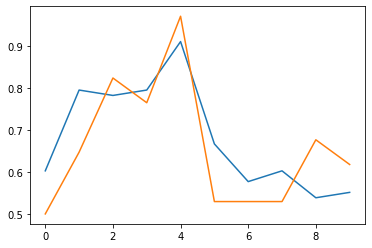

In [122]:
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])

Run model on test set

In [123]:
#Load best model
model.load_weights('weights.hdf5')
#Predict using best model
results = model.evaluate(x_test,y_test,batch_size=1)
print("test loss, test acc:", results)

38/38 [==============================] - 0s 8ms/step
test loss, test acc: [0.12104645636133539, 0.9736841917037964]


In [124]:
model.save("my_model.h5")

In [125]:
classify_this = load("classify_this.npy")

In [126]:
model.predict_classes(classify_this,batch_size=1,verbose=0)

array([0, 2, 0, 2, 0, 1, 2, 2, 2])